In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import os
import numpy as np
import warnings
import scipy.misc
import random

warnings.filterwarnings("ignore")


In [2]:
mnist = input_data.read_data_sets("datasets/MNIST_data", one_hot=True)

W0916 14:47:05.168325 4619789760 deprecation.py:323] From <ipython-input-2-f26dadb1d673>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0916 14:47:05.169770 4619789760 deprecation.py:323] From /Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0916 14:47:05.170774 4619789760 deprecation.py:323] From /Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instru

Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz


W0916 14:47:05.417584 4619789760 deprecation.py:323] From /Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0916 14:47:05.421754 4619789760 deprecation.py:323] From /Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0916 14:47:05.470778 4619789760 deprecation.py:323] From /Users/mac/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and

Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


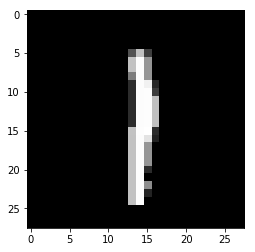

In [3]:
first_image = mnist.train.images[90]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
pixels_ori= scipy.misc.imresize(pixels, (28,28))
plt.imshow(pixels, cmap='gray')
#plt.imshow(pixels)
plt.show()




28
(14, 14)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20 63  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 42 31  9  0  0  0  0  0]
 [ 0  0  0  0  0  0 22 60 63  0  0  0  0  0]
 [ 0  0  0  0  0  0 22 60 32  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 61 59  0  0  0  0  0]
 [ 0  0  0  0  0  0 32 28  8  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32 42  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 48 63  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


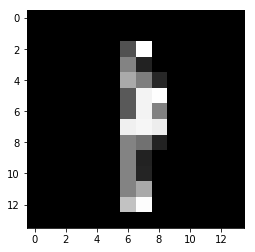

In [4]:
print(np.array(pixels_ori.shape)[1])
new_resized_pic = np.zeros((np.int(np.array(pixels_ori.shape)[0]/2),np.int(np.array(pixels_ori.shape)[1]/2)))

print(new_resized_pic.shape)
for i in range(new_resized_pic.shape[0]):
    for j in range(new_resized_pic.shape[1]):
        new_resized_pic[i,j] = 1/4*(pixels_ori[2*i,2*j]+pixels_ori[2*i,2*j+1]+pixels_ori[2*i+1,2*j]+pixels_ori[2*i+1,2*j+1])

print(np.uint8(new_resized_pic[:15,:15]))
plt.imshow(new_resized_pic, cmap='gray')
#plt.imshow(pixels)
plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  33  61   5   0   0   0   0   0]
 [  0   0   0   0   0   0  95 165  18   0   0   0   0   0]
 [  0   0   0   0   0   0  66 183  33   0   0   0   0   0]
 [  0   0   0   0   0   0  48 210  78   0   0   0   0   0]
 [  0   0   0   0   0   0  48 219 104   0   0   0   0   0]
 [  0   0   0   0   0   0  76 218  75   0   0   0   0   0]
 [  0   0   0   0   0   0 104 193  31   0   0   0   0   0]
 [  0   0   0   0   0   0 104 170  17   0   0   0   0   0]
 [  0   0   0   0   0   0 104 139   7   0   0   0   0   0]
 [  0   0   0   0   0   0 104 144   8   0   0   0   0   0]
 [  0   0   0   0   0   0  52  61   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


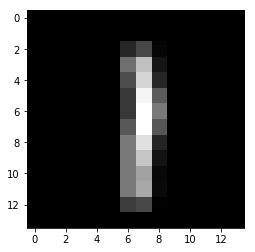

In [5]:

pixels_resize= scipy.misc.imresize(pixels, (14,14))
print(pixels_resize[:15,:15])

plt.imshow(pixels_resize, cmap='gray')
#plt.imshow(pixels)
plt.show()

In [6]:
all_label = np.argwhere(mnist.train.labels == 1)

for i in range(10):
    name='pic_'+str(i)
    locals()['pic_'+str(i)]= np.argwhere(all_label[:,1] == i)

np.random.choice(np.reshape(pic_2,pic_2.size), 1)


#pic_2.size

array([41966])

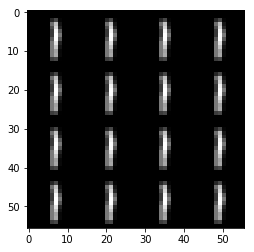

In [7]:
z = pixels_resize
for i in range(3):
    z = np.concatenate((z,pixels_resize), axis=0)

temp = z
for i in range(3):
    temp = np.concatenate((temp,z), axis=1)

    


plt.imshow(temp, cmap='gray')
plt.show()

In [8]:
def make_train_sample(height, width, mnist = input_data.read_data_sets("datasets/MNIST_data", one_hot=True) , flag = 0, abnormal_num = 0):
    #mnist = input_data.read_data_sets("datasets/MNIST_data", one_hot=True)
    all_label = np.argwhere(mnist.train.labels == 1)

    for i in range(10):
        name='pic_'+str(i)
        locals()['pic_'+str(i)]= np.argwhere(all_label[:,1] == i)
        
    pic_num_map = np.random.randint(0,5, size=(height, width))*2
        
    # if abnormal mode is on 
    if flag:
        transit_map = np.reshape(pic_num_map,height* width)
        transit_map[np.random.choice(height* width, abnormal_num, replace=False)] = 1
        pic_final_map = np.reshape(transit_map,(height,width))
    else:
        pic_final_map = pic_num_map
        
    #print(pic_final_map.T)
        
    for row in range(height):
        
        for col in range(width):
            choose_list=np.reshape(locals()['pic_'+str(pic_final_map[row,col])],locals()['pic_'+str(pic_final_map[row,col])].size)
            selected_pic = mnist.train.images[np.random.choice(choose_list,1)]
            selected_image = np.array(selected_pic, dtype='float')
            pixels = selected_image.reshape((28, 28))
            
            pixels_ori= scipy.misc.imresize(pixels, (28,28))
            new_resized_pic = np.zeros((np.int(np.array(pixels_ori.shape)[0]/2),np.int(np.array(pixels_ori.shape)[1]/2)))
            
            for i in range(new_resized_pic.shape[0]):
                for j in range(new_resized_pic.shape[1]):
                    new_resized_pic[i,j] = 1/4*(pixels_ori[2*i,2*j]+pixels_ori[2*i,2*j+1]+pixels_ori[2*i+1,2*j]+pixels_ori[2*i+1,2*j+1])

            
            
            name1='pcol_'+str(col)
            locals()['pcol_'+str(col)]= new_resized_pic
            
        
        name2='prow_'+str(row)
        locals()['prow_'+str(row)] =locals()['pcol_'+str(0)]
        
        #print(pcol_0.shape)
        #print(pcol_1.shape)
        
        
        for col in range(width-1):
             locals()['prow_'+str(row)] = np.concatenate((locals()['prow_'+str(row)],locals()['pcol_'+str(col+1)]), axis=0)
                
    
    
    
    output = locals()['prow_'+str(0)]
    #print(prow_0.shape)
    for row in range(height-1):
        #print(locals()['prow_'+str(row+1)].shape)
        output = np.concatenate((output,locals()['prow_'+str(row+1)]), axis=1)
        
    return output,pic_final_map
        
    
        
        
        
    
    
    

Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
def make_train_sample_mean(height, width, mnist = input_data.read_data_sets("datasets/MNIST_data", one_hot=True) , flag = 0, abnormal_num = 0):
    #mnist = input_data.read_data_sets("datasets/MNIST_data", one_hot=True)
    all_label = np.argwhere(mnist.train.labels == 1)

    for i in range(10):
        name='pic_'+str(i)
        locals()['pic_'+str(i)]= np.argwhere(all_label[:,1] == i)
        
    pic_num_map = np.random.randint(0,5, size=(height, width))*2
        
    # if abnormal mode is on 
    if flag:
        transit_map = np.reshape(pic_num_map,height* width)
        transit_map[np.random.choice(height* width, abnormal_num, replace=False)] = 1
        pic_final_map = np.reshape(transit_map,(height,width))
    else:
        pic_final_map = pic_num_map
        
    #print(pic_final_map.T)
        
    for row in range(height):
        
        for col in range(width):
            choose_list=np.reshape(locals()['pic_'+str(pic_final_map[row,col])],locals()['pic_'+str(pic_final_map[row,col])].size)
            selected_pic = mnist.train.images[np.random.choice(choose_list,1)]
            selected_image = np.array(selected_pic, dtype='float')
            pixels = selected_image.reshape((28, 28))
            
            name1='pcol_'+str(col)
            locals()['pcol_'+str(col)]= scipy.misc.imresize(pixels, (14,14))
            
        
        name2='prow_'+str(row)
        locals()['prow_'+str(row)] =locals()['pcol_'+str(0)]
        
        #print(pcol_0.shape)
        #print(pcol_1.shape)
        
        
        for col in range(width-1):
             locals()['prow_'+str(row)] = np.concatenate((locals()['prow_'+str(row)],locals()['pcol_'+str(col+1)]), axis=0)
                
    
    
    
    output = locals()['prow_'+str(0)]
    #print(prow_0.shape)
    for row in range(height-1):
        #print(locals()['prow_'+str(row+1)].shape)
        output = np.concatenate((output,locals()['prow_'+str(row+1)]), axis=1)
        
    return output,pic_final_map


Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


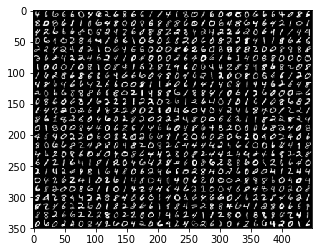

In [10]:
example,fmap = make_train_sample_mean(height = 32,width = 25,flag = 1,abnormal_num = 80)
#fig = plt.figure()
plt.imshow(example, cmap='gray')
plt.show()
#fig.savefig('plot.png')
scipy.misc.imsave('outfile.jpg', example)

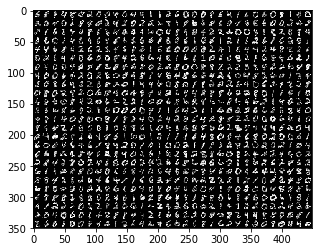

In [11]:
example,famp = make_train_sample(height = 32,width = 25,flag = 1,abnormal_num = 80)
#fig = plt.figure()
plt.imshow(example, cmap='gray')
plt.show()
#fig.savefig('plot.png')
scipy.misc.imsave('outfile.jpg', example)

In [12]:
from tempfile import TemporaryFile

In [13]:
try:
    os.mkdir("Sparse_dataset")
    os.makedirs("Sparse_dataset/train/positive_pic")
    os.makedirs("Sparse_dataset/train/negtive_pic")
    os.makedirs("Sparse_dataset/test/positive_pic")
    os.makedirs("Sparse_dataset/test/negtive_pic")
    
except:
    print("mkdir exists")

In [14]:
try:
    os.mkdir("Sparse_dataset_mean")
    os.makedirs("Sparse_dataset_mean/train/positive_pic")
    os.makedirs("Sparse_dataset_mean/train/negtive_pic")
    os.makedirs("Sparse_dataset_mean/test/positive_pic")
    os.makedirs("Sparse_dataset_mean/test/negtive_pic")
    
except:
    print("mkdir exists")

In [15]:
for count in range(40):
    example, fmap = make_train_sample(height = 32,width = 25)
    name_title='Sparse_dataset/train/negtive_pic/train_'+str(count)+ '.png'
    scipy.misc.imsave(name_title, example)
    np_title = 'Sparse_dataset/train/negtive_pic/train_'+str(count)+ '.npy'
    np.save(np_title, fmap)
    
    
for count in range(40):
    example, fmap = make_train_sample(height = 32,width = 25,flag = 1,abnormal_num = 80)
    name_title='Sparse_dataset/train/positive_pic/train_'+str(count)+ '.png'
    scipy.misc.imsave(name_title, example)
    np_title = 'Sparse_dataset/train/positive_pic/train_'+str(count)+ '.npy'
    np.save(np_title, fmap)


In [16]:
for count in range(40):
    example, fmap =make_train_sample_mean(height = 32,width = 25)
    name_title='Sparse_dataset_mean/train/negtive_pic/train_'+str(count)+ '.png'
    scipy.misc.imsave(name_title, example)
    np_title = 'Sparse_dataset_mean/train/negtive_pic/train_'+str(count)+ '.npy'
    np.save(np_title, fmap)
    
    
for count in range(40):
    example, fmap =make_train_sample_mean(height = 32,width = 25,flag = 1,abnormal_num = 80)
    name_title='Sparse_dataset_mean/train/positive_pic/train_'+str(count)+ '.png'
    scipy.misc.imsave(name_title, example)
    np_title = 'Sparse_dataset_mean/train/positive_pic/train_'+str(count)+ '.npy'
    np.save(np_title, fmap)
    


In [17]:
for count in range(500):
    example, fmap = make_train_sample_mean(height = 32,width = 25)
    name_title='Sparse_dataset_mean/test/negtive_pic/test_'+str(count)+ '.png'
    scipy.misc.imsave(name_title, example)
    np_title = 'Sparse_dataset_mean/test/negtive_pic/test_'+str(count)+ '.npy'
    np.save(np_title, fmap)
    
for count in range(500):
    example, fmap = make_train_sample_mean(height = 32,width = 25,flag = 1,abnormal_num = 80)
    name_title='Sparse_dataset_mean/test/positive_pic/test_'+str(count)+ '.png'
    scipy.misc.imsave(name_title, example)
    np_title = 'Sparse_dataset_mean/test/positive_pic/test_'+str(count)+ '.npy'
    np.save(np_title, fmap)

In [18]:
for count in range(500):
    example, fmap = make_train_sample(height = 32,width = 25)
    name_title='Sparse_dataset/test/negtive_pic/test_'+str(count)+ '.png'
    scipy.misc.imsave(name_title, example)
    np_title = 'Sparse_dataset/test/negtive_pic/test_'+str(count)+ '.npy'
    np.save(np_title, fmap)
    
for count in range(500):
    example, fmap = make_train_sample(height = 32,width = 25,flag = 1,abnormal_num = 80)
    name_title='Sparse_dataset/test/positive_pic/test_'+str(count)+ '.png'
    scipy.misc.imsave(name_title, example)
    np_title = 'Sparse_dataset/test/positive_pic/test_'+str(count)+ '.npy'
    np.save(np_title, fmap)